In [1]:
# TO DO:
# check column mapping to see if there are any inconsistencies
# analyze removed dupes to see if there are any discrepancies.  why dupes?

In [194]:
import json
import pandas as pd
import numpy as np
import re # regex

In [195]:
file_dir = 'C://git repos/movies_ETL/data/'
file_name = f'{file_dir}wikipedia-movies.json'

with open(file_name, mode='r') as file:
    wiki_movies_raw = json.load(file)
    
len(wiki_movies_raw)

7311

In [4]:
# check quality of first records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [5]:
# check quality of last records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [6]:
# check some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [196]:
kaggle_metadata = pd.read_csv(f'{file_dir}movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}ratings.csv')

In [8]:
kaggle_metadata.count()

adult                    45466
belongs_to_collection     4494
budget                   45466
genres                   45466
homepage                  7782
id                       45466
imdb_id                  45449
original_language        45455
original_title           45466
overview                 44512
popularity               45461
poster_path              45080
production_companies     45463
production_countries     45463
release_date             45379
revenue                  45460
runtime                  45203
spoken_languages         45460
status                   45379
tagline                  20412
title                    45460
video                    45460
vote_average             45460
vote_count               45460
dtype: int64

In [9]:
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [11]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
26277,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",http://www.thehuntersmovie.com/,81972,tt1591504,en,The Hunters,Alice and her friends are approaching the end ...,...,2011-12-27,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You are the prey!,The Hunters,False,3.9,14.0
37444,False,NaN,0,[],NaN,195804,tt0355439,zh,山水情,The story is about an impoverished elderly sch...,...,1988-12-31,0.0,19.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Feelings of Mountains and Waters,False,5.0,2.0
17231,False,NaN,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,102384,tt0018515,en,Two Arabian Knights,Director Lewis Milestone's 1927 comedy follows...,...,1927-09-23,0.0,92.0,[],Released,NaN,Two Arabian Knights,False,0.0,0.0
19565,False,NaN,200000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,13830,tt0281190,en,Shottas,A raw urban drama about two friends raised on ...,...,2002-02-27,0.0,95.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Friendship, loyalty & greed.",Shottas,False,7.4,38.0
4052,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,51802,tt0031742,en,Of Mice and Men,A mentally retarded giant and his level headed...,...,1939-12-30,0.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,She was made for love... and tragedy.,Of Mice and Men,False,7.3,19.0


In [12]:
ratings.count()

userId       26024289
movieId      26024289
rating       26024289
timestamp    26024289
dtype: int64

In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [197]:
ratings.tail()

,userId,movieId,rating,timestamp
26024284,270896,58559,5.00,1257031564
26024285,270896,60069,5.00,1257032032
26024286,270896,63082,4.50,1257031764
26024287,270896,64957,4.50,1257033990
26024288,270896,71878,2.00,1257031858


In [15]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
9221909,95206,355,3.0,834718082
13763553,143000,266,5.0,846478130
25923665,269844,6893,4.0,1077415773
10094181,104127,34,5.0,1112868938
7381885,76099,4901,3.5,1202407775


In [198]:
wiki_movies_raw_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_raw_df

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,"1,990.00",https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...","1,990.00",https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),"1,990.00",https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),"1,990.00",https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,"1,990.00",https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7306,https://en.wikipedia.org/wiki/Holmes_%26_Watson,"2,018.00",https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7307,https://en.wikipedia.org/wiki/Vice_(2018_film),"2,018.00",https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7308,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,"2,018.00",https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7309,https://en.wikipedia.org/wiki/Destroyer_(2018_...,"2,018.00",https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# 193 cols!
wiki_movies_raw_df.count()

url                 7153
year                7153
imdb_link           7100
title               7134
Directed by         7103
                    ... 
Russian                1
Hebrew                 1
Revenue                1
Operating income       1
Polish                 1
Length: 193, dtype: int64

In [18]:
wiki_movies_raw_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [200]:
# List comprehension to narrow down wiki set
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie]
len(wiki_movies)

7080

In [201]:
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7076,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,Adam McKay,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7077,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,Mimi Leder,Robert W. Cort,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7078,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,Karyn Kusama,"[Fred Berger, Phil Hay, Matt Manfredi]",NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Camera setup'

In [203]:
#only four records?  is that accurate?
wiki_movies_df.loc[wiki_movies_df['No. of episodes'].notnull()]

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
69,https://en.wikipedia.org/wiki/Eyes_on_the_Prize,1990,https://www.imdb.com/title/tt0092999/,Eyes on the Prize,"[Orlando Bagwell, Sheila Curran Bernard, Calli...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,https://en.wikipedia.org/wiki/Child_of_Rage,1992,https://www.imdb.com/title/tt0103955/,Child of Rage,Larry Peerce,NaN,NaN,NaN,NaN,"[Ashley Peldon, Mel Harris, Dwight Schultz, Sa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,https://en.wikipedia.org/wiki/The_Stand_(TV_mi...,1994,https://www.imdb.com/title/tt0108941/,The Stand,Mick Garris,NaN,Stephen King,NaN,"[The Stand, by, Stephen King]","[Gary Sinise, Molly Ringwald, Jamey Sheridan, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,https://en.wikipedia.org/wiki/Police_2020,1997,https://www.imdb.com/title/tt0216978/,Police 2020,David Richards,NaN,NaN,NaN,NaN,"[Liam Cunningham, Rachel Davies, Nick Reding, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [204]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [205]:
def clean_movie(movie):
    movie = dict(movie) # creates a non-destructive copy.  DON'T UNDERSTAND THIS SYNTAX
    
    # Clean alternate titles
    alt_titles = dict()
    languages = ['Arabic',
                 'Cantonese',
                 'Chinese',
                 'French',
                 'Hangul',
                 'Hebrew',
                 'Hepburn',
                 'Japanese',
                 'Literally',
                 'Mandarin',
                 'McCune–Reischauer',
                 'Polish',
                 'Revised Romanization',
                 'Romanized',
                 'Russian',
                 'Simplified',
                 'Traditional',
                 'Yiddish']

    for language in languages:
        if language in movie:
            alt_titles[language] = movie[language]
            movie.pop(language)

    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles
    
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director(s)')
    change_column_name('Director', 'Director(s)')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Written by', 'Writer(s)')
    
    return movie

In [25]:
# wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

In [207]:
# skill drill: go through each column and determine which ones hold alternate titles
sorted(wiki_movies_df.columns.tolist())

# Full list (I think):
# Arabic
# Cantonese
# Chinese
# French
# Hangul
# Hebrew
# Hepburn
# Japanese
# Literally
# Mandarin
# McCune–Reischauer
# Polish
# Revised Romanization
# Romanized
# Russian
# Simplified
# Traditional
# Yiddish

['Adaptation by',
 'Also known as',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'No. of episodes',
 'Opening theme',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russ

In [27]:
# wiki_movies_df[wiki_movies_df['Arabic'].notnull()]
# wiki_movies_df[wiki_movies_df['Arabic'].notnull()]

# movie = clean_movie(wiki_movies_df.iloc[6838])
 
# movie

In [208]:
# Run clean movies function to get columns lined up etc
clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Also known as',
 'Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director(s)',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Running time',
 'Screen story by',
 'Screenplay by',
 'Starring',
 'Story by',
 'Suggested by',
 'Theme music composer',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [209]:
wiki_movies_df['imdb_link']

0       https://www.imdb.com/title/tt0098987/
1       https://www.imdb.com/title/tt0098994/
2       https://www.imdb.com/title/tt0099005/
3       https://www.imdb.com/title/tt0099012/
4       https://www.imdb.com/title/tt0099018/
                        ...                  
7071    https://www.imdb.com/title/tt1255919/
7072    https://www.imdb.com/title/tt6266538/
7073    https://www.imdb.com/title/tt4669788/
7074    https://www.imdb.com/title/tt7137380/
7075    https://www.imdb.com/title/tt9495224/
Name: imdb_link, Length: 7076, dtype: object

In [210]:
# it's regex time!!  Remove dupes in accordance with standard IMDB ID
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Screenplay by,Story by,Based on,Starring,Narrated by,Music by,...,Released,Recorded,Venue,Label,Also known as,Animation by,Color process,Screen story by,Original title,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay","[Cliff Eidelman, Yello]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Maurice Jarre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Charles Gross,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Maurice Jarre,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [211]:
# how many of these values are null in each col?
    # This stuff *clearly* needs to be consolidated with some titles

# wiki_movies_df[[column for column in wiki_movies_df.columns]].count()

# [[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]
# [[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() > len(wiki_movies_df) * .9]

wiki_columns_to_keep = [column 
                        for column in wiki_movies_df.columns 
                        if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * .9]

wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

wiki_movies_df

,url,year,imdb_link,title,Screenplay by,Story by,Based on,Starring,Music by,Cinematography,...,Language,Budget,Box office,Director(s),Distributor,Editor(s),Producer(s),Writer(s),Productioncompanies,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","[Cliff Eidelman, Yello]",Oliver Wood,...,English,$20 million,$21.4 million,Renny Harlin,20th Century Fox,Michael Tronick,"[Steve Perry, Joel Silver]",NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Maurice Jarre,Mark Plummer,...,English,$6 million,$2.7 million,James Foley,Avenue Pictures,Howard E. Smith,"[Ric Kidney, Robert Redlin]",NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Charles Gross,Roger Deakins,...,"[English, Lao]",$35 million,"$57,718,089",Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Daniel Melnick,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,...,English,$12 million,"$7,331,647",Woody Allen,Orion Pictures,Susan E. Morse,Robert Greenhut,Woody Allen,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Maurice Jarre,Russell Boyd,...,English,$25 million,"$6,939,946 (USA)",John Cornell,Paramount Pictures,David Stiven,John Cornell,Paul Hogan,NaN,tt0099018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Mark Mothersbaugh,Oliver Wood,...,English,$42 million,$41.9 million,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",NaN,"[Columbia Pictures, Gary Sanchez Productions, ...",tt1255919
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Nicholas Britell,Greig Fraser,...,English,$60 million,$76.1 million,Adam McKay,Mirror Releasing,Hank Corwin,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",Adam McKay,NaN,tt6266538
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Mychael Danna,Michael Grady,...,English,$20 million,$38.4 million,Mimi Leder,Focus Features,Michelle Tesoro,Robert W. Cort,Daniel Stiepleman,"[Focus Features, [1], Participant Media, [1], ...",tt4669788
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Theodore Shapiro,Julie Kirkwood,...,English,$9 million,$5.5 million,Karyn Kusama,Mirror Releasing,Plummy Tucker,"[Fred Berger, Phil Hay, Matt Manfredi]","[Phil Hay, Matt Manfredi]",NaN,tt7137380


In [62]:
# Get field types to see which need to be converted to int/date/etc
wiki_movies_df.dtypes

url                     object
year                     int64
imdb_link               object
title                   object
Screenplay by           object
Story by                object
Based on                object
Starring                object
Music by                object
Cinematography          object
Productioncompany       object
Release date            object
Running time            object
Country                 object
Language                object
Budget                  object
Box office              object
Director(s)             object
Distributor             object
Editor(s)               object
Producer(s)             object
Writer(s)               object
Productioncompanies     object
imdb_id                 object
dtype: object

In [212]:
# make series of box office data
box_office = wiki_movies_df['Box office'].dropna()

In [213]:
box_office.count()

5485

In [214]:
# not using this: lambda funciton instead on next cell
def is_not_a_string(x):
    return type(x) != str

# 135 non-string
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [215]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
                            
box_office[box_office.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

In [216]:
import re # regex module
box_office[box_office.map(lambda x: type(x) != str)]

Series([], Name: Box office, dtype: object)

In [217]:
# capture refined million/billion results
form_one = r"\$\s*\d+\.?\d*\s*[mb]illi?on"
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3903

In [218]:
form_two = r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)"
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1559

In [219]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [220]:
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [221]:
def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan
    
    # if input is of form $###.# million
    if re.match(r"\$\s*\d+\.?\d*\s*milli?on", s, flags=re.IGNORECASE):
    
        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        # convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value
           
    # if input is of the form $###.# billion
    elif re.match(r"\$\s*\d+\.?\d*\s*billi?on", s, flags=re.IGNORECASE):
    
        # remove dollar sign and ' billion'
        s = re.sub('\$|\s|[a-zA-Z]','',s) 

        # convert to float and multiply by a billion
        value = float(s) * 10**9
        
        # return value
        return value
        
    # if input is of the form $###,###,###
    elif re.match(r"\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)", s, flags=re.IGNORECASE):
    
        # remove dollar sign and commas
        s = re.sub('\$|,','',s)
        
        # convert to float
        value = float(s)
        
        # return value
        return value
        
    # otherwise, return NaN
    else:
        return np.nan

In [222]:
wiki_movies_df['box_office'] = box_office.str.extract(pat=f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [223]:
wiki_movies_df[['box_office', 'Box office']]

,box_office,Box office
0,"21,400,000.00",$21.4 million
1,"2,700,000.00",$2.7 million
2,"57,718,089.00","$57,718,089"
3,"7,331,647.00","$7,331,647"
4,"6,939,946.00","$6,939,946 (USA)"
...,...,...
7071,"41,900,000.00",$41.9 million
7072,"76,100,000.00",$76.1 million
7073,"38,400,000.00",$38.4 million
7074,"5,500,000.00",$5.5 million


In [224]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

### Clean the budget data

In [234]:
budget = wiki_movies_df['Budget'].dropna()

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

#remove specified ranges
budget = budget.str.replace(r'\$.*[-—–](?![a-z])' , '$', regex=True)

# for value in budget:
#     print(value)

In [236]:
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [239]:
# get rid of strings
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\espoe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [243]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Budget', axis=1, inplace=True)
wiki_movies_df['budget']

### parse release date

In [261]:
# PARSE THE DATE
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
release_date.head(50)

0                          July 11, 1990 ( 1990-07-11 )
1     May 17, 1990 ( 1990-05-17 ) (Cannes Film Marke...
2                        August 10, 1990 ( 1990-08-10 )
3                      December 25, 1990 ( 1990-12-25 )
4                                     December 19, 1990
5                         March 22, 1990 ( 1990-03-22 )
6     October 6, 1990 ( 1990-10-06 ) ( New York Film...
7                          March 8, 1991 ( 1991-03-08 )
8                          March 7, 1990 ( 1990-03-07 )
9                             February 23, 1990 ( USA )
10                          June 8, 1990 ( 1990-06-08 )
11                         July 18, 1990 ( 1990-07-18 )
12       October 5, 1990 ( 1990-10-05 ) (United States)
13    December 20, 1990 (limited U.S.) January 11, 1...
14                          May 25, 1990 ( 1990-05-25 )
15                                        March 9, 1990
16                         March 2, 1990 ( 1990-03-02 )
17                         June 22, 1990 ( 1990-

In [285]:
# match string one: Month Name, 1-2 digits, 4 digit year
date_pat_1 = r"\w*\s\d{1,2},\s\d{4}"
matches_pat_1 = release_date.str.contains(date_pat_1, flags=re.IGNORECASE, na=False)
# matches_pat_1.head(50)

# pattern 2: yyyy-dd-mm
date_pat_2 = r"\d{4}[-—–]\d{2}[-—–]\d{2}"
matches_pat_2 = release_date.str.contains(date_pat_2, flags=re.IGNORECASE, na=False)
# matches_pat_2.head(50)

# pattern 3: month name, year
date_pat_3 = r"\w{3,10}\s\d{4}"
matches_pat_3 = release_date.str.contains(date_pat_3, flags=re.IGNORECASE, na=False)
# release_date[matches_pat_3].sample(50)

# pattern 4: four letter year
date_pat_4 = r"\d{4}"
matches_pat_4 = release_date.str.contains(date_pat_4, flags=re.IGNORECASE, na=False)
# release_date[~matches_pat_1 & ~matches_pat_2 & ~matches_pat_3 & matches_pat_4].sample(50)

wiki_movies_df['release_date'] = pd.to_datetime(
    release_date.str.extract(f'({date_pat_1}|{date_pat_2}|{date_pat_3}|{date_pat_4})')[0],
    infer_datetime_format=True,
    errors='coerce')

wiki_movies_df

,url,year,imdb_link,title,Screenplay by,Story by,Based on,Starring,Music by,Cinematography,...,Director(s),Distributor,Editor(s),Producer(s),Writer(s),Productioncompanies,imdb_id,box_office,budget,release_date
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","[Cliff Eidelman, Yello]",Oliver Wood,...,Renny Harlin,20th Century Fox,Michael Tronick,"[Steve Perry, Joel Silver]",NaN,NaN,tt0098987,"21,400,000.00","20,000,000.00",1990-07-11
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Maurice Jarre,Mark Plummer,...,James Foley,Avenue Pictures,Howard E. Smith,"[Ric Kidney, Robert Redlin]",NaN,NaN,tt0098994,"2,700,000.00","6,000,000.00",1990-05-17
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Charles Gross,Roger Deakins,...,Roger Spottiswoode,TriStar Pictures,"[John Bloom, Lois Freeman-Fox]",Daniel Melnick,NaN,NaN,tt0099005,"57,718,089.00","35,000,000.00",1990-08-10
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,...,Woody Allen,Orion Pictures,Susan E. Morse,Robert Greenhut,Woody Allen,NaN,tt0099012,"7,331,647.00","12,000,000.00",1990-12-25
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Maurice Jarre,Russell Boyd,...,John Cornell,Paramount Pictures,David Stiven,John Cornell,Paul Hogan,NaN,tt0099018,"6,939,946.00","25,000,000.00",1990-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7071,https://en.wikipedia.org/wiki/Holmes_%26_Watson,2018,https://www.imdb.com/title/tt1255919/,Holmes & Watson,Etan Cohen,NaN,"[Sherlock Holmes, and, Dr. Watson, by, Sir Art...","[Will Ferrell, John C. Reilly, Rebecca Hall, R...",Mark Mothersbaugh,Oliver Wood,...,Etan Cohen,Sony Pictures Releasing,Dean Zimmerman,"[Will Ferrell, Adam McKay, Jimmy Miller, Clayt...",NaN,"[Columbia Pictures, Gary Sanchez Productions, ...",tt1255919,"41,900,000.00","42,000,000.00",2018-12-25
7072,https://en.wikipedia.org/wiki/Vice_(2018_film),2018,https://www.imdb.com/title/tt6266538/,Vice,NaN,NaN,NaN,"[Christian Bale, Amy Adams, Steve Carell, Sam ...",Nicholas Britell,Greig Fraser,...,Adam McKay,Mirror Releasing,Hank Corwin,"[Brad Pitt, Dede Gardner, Jeremy Kleiner, Kevi...",Adam McKay,NaN,tt6266538,"76,100,000.00","60,000,000.00",2018-12-11
7073,https://en.wikipedia.org/wiki/On_the_Basis_of_Sex,2018,https://www.imdb.com/title/tt4669788/,On the Basis of Sex,NaN,NaN,NaN,"[Felicity Jones, Armie Hammer, Justin Theroux,...",Mychael Danna,Michael Grady,...,Mimi Leder,Focus Features,Michelle Tesoro,Robert W. Cort,Daniel Stiepleman,"[Focus Features, [1], Participant Media, [1], ...",tt4669788,"38,400,000.00","20,000,000.00",2018-11-08
7074,https://en.wikipedia.org/wiki/Destroyer_(2018_...,2018,https://www.imdb.com/title/tt7137380/,Destroyer,NaN,NaN,NaN,"[Nicole Kidman, Sebastian Stan, Toby Kebbell, ...",Theodore Shapiro,Julie Kirkwood,...,Karyn Kusama,Mirror Releasing,Plummy Tucker,"[Fred Berger, Phil Hay, Matt Manfredi]","[Phil Hay, Matt Manfredi]",NaN,tt7137380,"5,500,000.00","9,000,000.00",2018-08-31


### Parse running time

In [309]:
# wiki_movies_df['Running time'].dropna().sample(50)

running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)
# running_time

runtime_pat_0 = "\d+\s*ho?u?r?s?\s*\d*"
matches_pat_0 = running_time.str.contains(runtime_pat_0, flags=re.IGNORECASE, na=False)

runtime_pat_1 = r'\d{1,3}\s*min'
matches_pat_1 = running_time.str.contains(runtime_pat_1, flags=re.IGNORECASE, na=False)

# running_time[~matches_pat_0 & ~matches_pat_1]

In [315]:
running_time_extract = running_time.str.extract(r"(\d+)\s*ho?u?r?s?\s*(\d*)|(\d{1,3})\s*m")
running_time_extract

In [324]:
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)
# wiki_movies_df[['Running time', 'running_time']].sample(50)

### Clean the Kaggle data

In [128]:
kaggle_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [133]:
kaggle_metadata[["popularity", "poster_path", "production_companies", "status", "tagline", "vote_aver"]]

,popularity,poster_path,production_companies,status,tagline,video
0,21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]",Released,NaN,False
1,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Released,Roll the dice and unleash the excitement!,False
2,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",Released,Still Yelling. Still Fighting. Still Ready for...,False
3,3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,Released,Friends are the people who let you be yourself...,False
4,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...",Released,Just When His World Is Back To Normal... He's ...,False
...,...,...,...,...,...,...
45461,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],Released,Rising and falling between a man and woman,False
45462,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]",Released,NaN,False
45463,0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]",Released,A deadly game of wits.,False
45464,0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]",Released,NaN,False


In [136]:
#bad data here!!  summaries.
kaggle_metadata["adult"].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [137]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult', axis='columns')


KeyError: 'adult'

In [145]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [147]:
# convert to bool
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [149]:
kaggle_metadata.dtypes

belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
dtype: object

In [156]:
# no non-numeric budget cols.  very nice!
kaggle_metadata[kaggle_metadata['budget'].str.isnumeric() == False]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [157]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)

0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45454, dtype: int32

In [158]:
# no non-numeric ids either.
kaggle_metadata[kaggle_metadata['id'].str.isnumeric() == False]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [159]:
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')

In [162]:
# why does popularity show up as non-numeric?
kaggle_metadata[kaggle_metadata['popularity'].str.isnumeric() == False]

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [163]:
kaggle_metadata.dtypes

belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                         int64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                       bool
vote_average             float64
vote_count               float64
dtype: object

In [166]:
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [167]:
ratings.info(null_counts=True)

C:\Users\espoe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [168]:
# looks reasonable, let's assign to timestamp value
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [169]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,2015-03-09 22:52:09
1,1,147,4.5,2015-03-09 23:07:15
2,1,858,5.0,2015-03-09 22:52:03
3,1,1221,5.0,2015-03-09 22:52:26
4,1,1246,5.0,2015-03-09 22:52:36


### Poke around ratings value and run statistical analysis
### Add me to cheat sheet later.

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

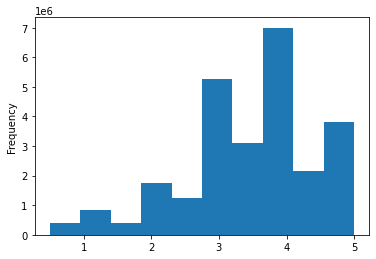

In [171]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

### Merge data sets

In [174]:
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])
movies_df

,url,year,imdb_link,title_wiki,Screenplay by,Story by,Based on,Starring,Music by,Cinematography,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","[Cliff Eidelman, Yello]",Oliver Wood,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Maurice Jarre,Mark Plummer,...,1990-08-24,0.00,114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Charles Gross,Roger Deakins,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,...,1990-12-25,0.00,102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Maurice Jarre,Russell Boyd,...,1990-12-21,0.00,95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,A Fantastic Woman,NaN,NaN,NaN,"[Daniela Vega, Francisco Reyes]",Matthew Herbert,Benjamín Echazarreta,...,2017-04-06,0.00,104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,Permission,NaN,NaN,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",NaN,Adam Bricker,...,2017-04-22,0.00,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,Loveless,"[Oleg Negin, Andrey Zvyagintsev]",NaN,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...","[Evgueni Galperine, Sacha Galperine]",Mikhail Krichman,...,2017-06-01,0.00,128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,Gemini,NaN,NaN,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Keegan DeWitt,Andrew Reed,...,2017-03-12,0.00,92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [ ]:
# i thought i dropped the box office col?
# matching criteria on the above seems to be disregarding capitalization
# why is release date not in here?
sorted(movies_df.columns)

## md table test

| wikipedia | kaggle | result |
| --- | --- | --- |
| title_wiki | title_kaggle | drop wiki |

In [180]:
movies_df[['title_wiki', 'title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [182]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [184]:
# going with kaggle data based on clarity above.  vetting quality
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Screenplay by,Story by,Based on,Starring,Music by,Cinematography,...,release_date,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [190]:
# eventually: build a scatterplot to determine runtime.

# movies_df.fillna(0).plot(x='Running time', y='runtime', kind='scatter')


# error here needs cleanup.  something is a list on running time!!  How did we miss this??
# movies_df[['Running time', 'runtime']].dtypes
movies_df[['Running time']]

,Running time
0,102 minutes
1,114 minutes
2,113 minutes
3,106 minutes
4,95 minutes
...,...
6047,104 minutes
6048,96 minutes
6049,127 minutes
6050,92 minutes


In [192]:
# movies_df.fillna(0).plot(x='Budget', y='budget', kind='scatter')
movies_df[['Budget', 'budget']].dtypes

Budget    object
budget    object
dtype: object